# Семантический анализ

Допустим у нас есть данные с результатами соц. опроса группы людей, которая хочет открыть свой киноклуб. Проведем семантический анализ полученых ответов с целью выявления наиболее важных факторов, которы нам стоит учесть при открытии киноклуба.


Будем рисовать облако слов на основе ответов на открытый вопрос.

In [405]:
import pandas as pd # Подключаем библиотеки pandas
import numpy as np # и numpy

In [406]:
url = '/content/dataset.csv'
df = pd.read_csv(url)

df.head(4) # Выведем посмотреть первые 4 строки датасета

,Отметка времени,1. Учитесь ли вы на матфаке?,2. Пол,3. Возраст,4. Любите ли вы смотреть фильмы?,5. Какие фильмы вы предпочитаете смотреть в кино?,6. Как часто вы смотрите фильмы в кинотеатрах?,"7. При походе в кинотеатр пользуетесь ли вы услугами баров при них?(покупаете ли вы воду, попкорн и др.)",8. Какой попкорн вы предпочитаете?,9. Чем вы руководствуетесь при выборе фильма?,10. Из каких источников вы получаете информацию об афише кинотеатра?,11. Какие жанры вы предпочитаете?,"12. Интересен ли вам формат просмотра кино с друзьями? (где 1 - совсем неинтересно, а 5 - смотрю только с друзьями)",13. Готовы ли вы приезжать на матфак для совместного просмотра кино по выходным?,14. Что у вас ассоциируется с просмотром кино?,15. Вы котёнок?
0,2024/08/20 3:46:01 PM GMT+3,Я преподаватель,Женский,от 19 до 35 лет,Да,"Разницы нет, были бы интересные",Раз в 2-3 месяца,Редко,Карамельный,"Выбираю фильмы, обсуждаемые общественностью;Ор...",Наружная реклама;Сайт кинотеатра,Детективное кино;Комедии;Мелодрамы;Мультфильмы,3,Нет,"Релакс, хорошее настроение, отдых",Да
1,2024/08/20 7:06:18 PM GMT+3,Я преподаватель,Мужской,от 14 до 18 лет,Да,Зарубежные,Раз в 2-3 месяца,Редко,Сырный,"Выбираю фильмы, обсуждаемые общественностью;Дл...",Интернет,Детективное кино;Комедии;Мелодрамы;Приключения...,3,Да,"Зелёный чай, печенье, поздний вечер",Мяу
2,2024/08/21 3:50:15 PM GMT+3,Да,Женский,от 14 до 18 лет,Затрудняюсь ответить,Зарубежные,Раз в полгода и реже,Практически всегда,Соленый,"Выбираю фильмы, обсуждаемые общественностью;Вы...",Интернет;Сайт кинотеатра,Комедии;Мелодрамы;Мультфильмы;Приключения;Фант...,3,Да,NaN,Мяу
3,2024/08/21 3:51:47 PM GMT+3,Да,Мужской,от 14 до 18 лет,Да,Зарубежные,Раз в месяц,Практически всегда,Соленый,"Выбираю фильмы, обсуждаемые общественностью",Наружная реклама,Фильмы ужасов,5,Да,Попкорн,Мяу


In [407]:
df.columns #Смотрим какие были вопросы в соц. опросе

Index(['Отметка времени', '1. Учитесь ли вы на матфаке?', '2. Пол',
       '3. Возраст', '4. Любите ли вы смотреть фильмы?',
       '5. Какие фильмы вы предпочитаете смотреть в кино?',
       '6. Как часто вы смотрите фильмы в кинотеатрах?',
       '7. При походе в кинотеатр пользуетесь ли вы услугами баров при них?(покупаете ли вы воду, попкорн и др.) ',
       '8. Какой попкорн вы предпочитаете?',
       '9. Чем вы руководствуетесь при выборе фильма?',
       '10. Из каких источников вы получаете информацию об афише кинотеатра?',
       '11. Какие жанры вы предпочитаете?',
       '12. Интересен ли вам формат просмотра кино с друзьями? (где 1 - совсем неинтересно, а 5 - смотрю только с друзьями)',
       '13. Готовы ли вы приезжать на матфак для совместного просмотра кино по выходным?',
       '14. Что у вас ассоциируется с просмотром кино?', '15. Вы котёнок?'],
      dtype='object')

In [408]:
# Для удобства заменим заголовки нужных нам столбцов
df.rename(columns={'14. Что у вас ассоциируется с просмотром кино?': 'Text1'}, inplace=True)
df.rename(columns={'12. Интересен ли вам формат просмотра кино с друзьями? (где 1 - совсем неинтересно, а 5 - смотрю только с друзьями)': 'Text2'}, inplace=True)

df.head(4)

,Отметка времени,1. Учитесь ли вы на матфаке?,2. Пол,3. Возраст,4. Любите ли вы смотреть фильмы?,5. Какие фильмы вы предпочитаете смотреть в кино?,6. Как часто вы смотрите фильмы в кинотеатрах?,"7. При походе в кинотеатр пользуетесь ли вы услугами баров при них?(покупаете ли вы воду, попкорн и др.)",8. Какой попкорн вы предпочитаете?,9. Чем вы руководствуетесь при выборе фильма?,10. Из каких источников вы получаете информацию об афише кинотеатра?,11. Какие жанры вы предпочитаете?,Text2,13. Готовы ли вы приезжать на матфак для совместного просмотра кино по выходным?,Text1,15. Вы котёнок?
0,2024/08/20 3:46:01 PM GMT+3,Я преподаватель,Женский,от 19 до 35 лет,Да,"Разницы нет, были бы интересные",Раз в 2-3 месяца,Редко,Карамельный,"Выбираю фильмы, обсуждаемые общественностью;Ор...",Наружная реклама;Сайт кинотеатра,Детективное кино;Комедии;Мелодрамы;Мультфильмы,3,Нет,"Релакс, хорошее настроение, отдых",Да
1,2024/08/20 7:06:18 PM GMT+3,Я преподаватель,Мужской,от 14 до 18 лет,Да,Зарубежные,Раз в 2-3 месяца,Редко,Сырный,"Выбираю фильмы, обсуждаемые общественностью;Дл...",Интернет,Детективное кино;Комедии;Мелодрамы;Приключения...,3,Да,"Зелёный чай, печенье, поздний вечер",Мяу
2,2024/08/21 3:50:15 PM GMT+3,Да,Женский,от 14 до 18 лет,Затрудняюсь ответить,Зарубежные,Раз в полгода и реже,Практически всегда,Соленый,"Выбираю фильмы, обсуждаемые общественностью;Вы...",Интернет;Сайт кинотеатра,Комедии;Мелодрамы;Мультфильмы;Приключения;Фант...,3,Да,NaN,Мяу
3,2024/08/21 3:51:47 PM GMT+3,Да,Мужской,от 14 до 18 лет,Да,Зарубежные,Раз в месяц,Практически всегда,Соленый,"Выбираю фильмы, обсуждаемые общественностью",Наружная реклама,Фильмы ужасов,5,Да,Попкорн,Мяу


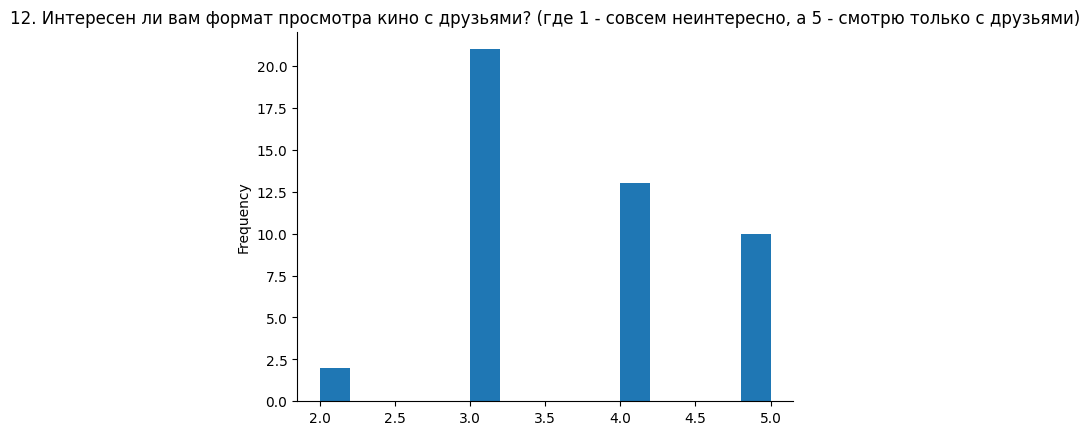

In [409]:
# Накидаем ещё каких-нибудь графиков, почему нет
from matplotlib import pyplot as plt
df['Text2'].plot(kind='hist', bins=15, title='12. Интересен ли вам формат просмотра кино с друзьями? (где 1 - совсем неинтересно, а 5 - смотрю только с друзьями)')
plt.gca().spines[['top', 'right',]].set_visible(False) # Настраиваем внешний вид графика

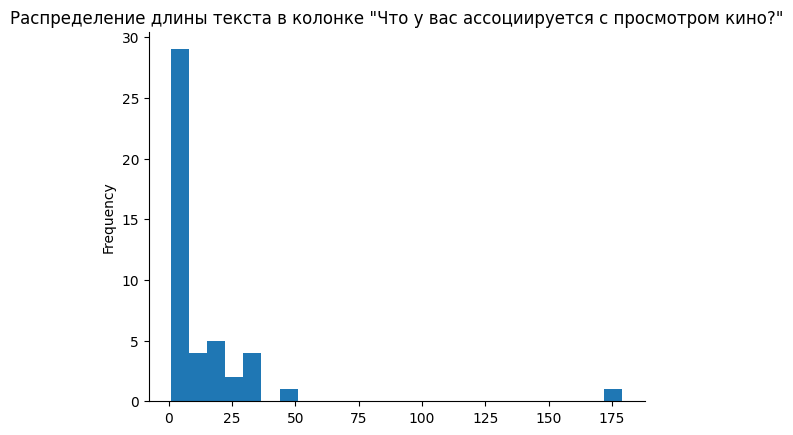

In [410]:
df['text_length'] = df['Text1'].astype(str).str.len()
df['text_length'].plot(kind='hist', bins=25, title='Распределение длины текста в колонке "Что у вас ассоциируется с просмотром кино?"')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [411]:
!pip install fuzzywuzzy python-Levenshtein # Подключим библиотеку fuzzywuzzy, Levenstein нужен чтобы всё это дело ускорить

In [412]:
import time
import string
import pandas as pd
import numpy as np
from fuzzywuzzy import process

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from pymorphy2 import MorphAnalyzer
from collections import Counter
from wordcloud import WordCloud

In [413]:
df['Text1'].fillna('', inplace=True) # Заменяем отсутствующие значения на пустые строки

<ipython-input-413-27b3527b2f69>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Text1'].fillna('', inplace=True) # Заменяем отсутствующие значения на пустые строки


In [414]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

morph = MorphAnalyzer()

def digest(textik): # Функция для переваривания текста: удаления знаков препинания и лемматизации
    stop_words = set(stopwords.words('russian')) # Загрузка стоп-слов для русского языка
    textik = textik.translate(str.maketrans('', '', string.punctuation)) # Удаление знаков препинания
    tokens = word_tokenize(textik) # Токенизация текста
    tokens = [morph.parse(word)[0].normal_form for word in tokens if word.lower() not in stop_words] # Удаление стоп-слов и лемматизация
    return ' '.join(tokens) # Склеиваем леммы обратно в строку

# Применяем функцию к колонке 'Text'
digested = df['Text1'].apply(digest)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


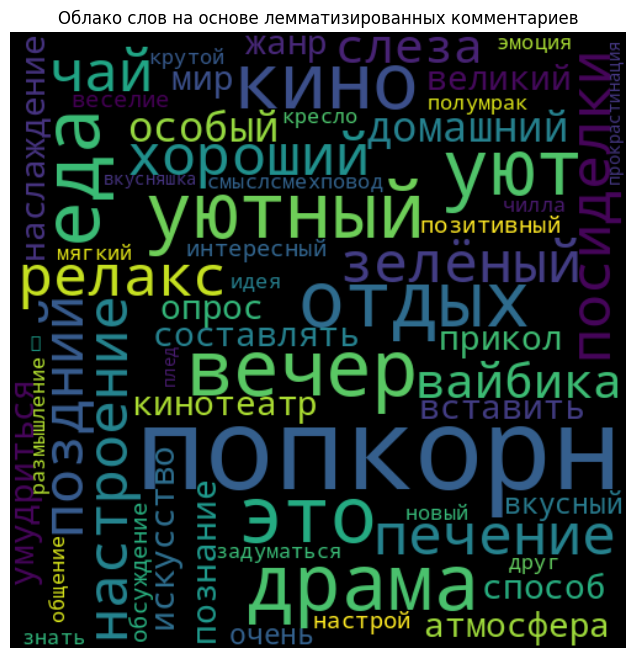

In [415]:
comments = ' '.join(digested)
tokens = comments.split() # Разбиваем строки на отдельные
word_counts = Counter(tokens) # Подсчет частоты встречаемости слов

wordcloud = WordCloud(width=500, height=500, background_color='black').generate_from_frequencies(word_counts) # Создание облака слов

# Отображение облака слов
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов на основе лемматизированных комментариев')
plt.show()